## EDA1: TRAIN DATA



In [95]:
# importing data manipulation library
import pandas as pd
import numpy as np


In [96]:
data =pd.read_csv(r"C:\Users\User\Desktop\Messy-Food-Waste-Prediction\data\raw_data\train.csv")

In [97]:
data.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


## Exploratory Data Analysis

In [98]:
# checking the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


In [99]:
# checking out the number of rows and columns in the data

data.shape

(911, 12)

In [100]:
# listing out the columns in the data set
data.columns

Index(['ID', 'date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category', 'food_waste_kg'],
      dtype='object')

In [101]:
# dropping the ID and date columns as they are not useful for analysis
data.drop(columns=['ID', "date"], inplace=True
          )

In [102]:
data.columns

Index(['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent',
       'day_of_week', 'special_event', 'past_waste_kg', 'staff_experience',
       'waste_category', 'food_waste_kg'],
      dtype='object')

In [103]:
# checking for missing values in the data
for column in data.columns:
    if data[column].isnull().any():
        print(f"columns: {column} | missing values: {data[column].isnull().sum()}")


columns: staff_experience | missing values: 164


In [104]:
# checking for duplicate rows in the data
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    print(f"duplicate row found: {duplicate_rows}")
else:
    print("no duplicate rows found")

no duplicate rows found


In [105]:
# check the data type of staff_experience
print (data["staff_experience"].dtypes)

object


In [106]:
duplicate_values = data["staff_experience"].value_counts()
print (duplicate_values [duplicate_values > 1])


staff_experience
Beginner        191
Intermediate    186
EXPERT          186
intermediate    184
Name: count, dtype: int64


In [107]:
data["staff_experience"] = data["staff_experience"].replace ("intermediate", "Intermediate")

In [108]:
data["staff_experience"] = data["staff_experience"].replace(
    {
        "EXPERT": "Expert"
    }
)

In [109]:
data.columns

Index(['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent',
       'day_of_week', 'special_event', 'past_waste_kg', 'staff_experience',
       'waste_category', 'food_waste_kg'],
      dtype='object')

In [110]:
# lets deal with the objects in the columns
# we have staff_experience and waste_category
data["staff_experience"].isna().value_counts()


staff_experience
False    747
True     164
Name: count, dtype: int64

In [111]:
# we will drop nan values in staff_experience, since the percentage of nan value is very small compared to the data
data = data.dropna(subset=["staff_experience"])


In [112]:
data["waste_category"].isna().sum()


0

In [113]:
data["waste_category"].value_counts()

waste_category
MEAT          176
dairy         148
GRAINS        142
MeAt          141
Vegetables    140
Name: count, dtype: int64

In [114]:
# convert the data type of waste_category from int to string
data["waste_category"] = data["waste_category"].astype(str)

In [115]:
data["waste_category"].value_counts()

waste_category
MEAT          176
dairy         148
GRAINS        142
MeAt          141
Vegetables    140
Name: count, dtype: int64

In [116]:
data["waste_category"] = data["waste_category"].str.lower()

In [117]:
data["waste_category"].value_counts()

waste_category
meat          317
dairy         148
grains        142
vegetables    140
Name: count, dtype: int64

In [118]:
data["waste_category"] = data["waste_category"].astype(str)

In [121]:
data["staff_experience"].isna().sum()


0

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   meals_served      747 non-null    int64  
 1   kitchen_staff     747 non-null    int64  
 2   temperature_C     747 non-null    float64
 3   humidity_percent  747 non-null    float64
 4   day_of_week       747 non-null    int64  
 5   special_event     747 non-null    int64  
 6   past_waste_kg     747 non-null    float64
 7   staff_experience  747 non-null    object 
 8   waste_category    747 non-null    object 
 9   food_waste_kg     747 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 64.2+ KB


In [128]:
data["special_event"].value_counts()

special_event
0    681
1     66
Name: count, dtype: int64

In [129]:
cols = ["special_event", "staff_experience", "waste_category"]
data[cols] = data[cols].astype("category")


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      747 non-null    int64   
 1   kitchen_staff     747 non-null    int64   
 2   temperature_C     747 non-null    float64 
 3   humidity_percent  747 non-null    float64 
 4   day_of_week       747 non-null    int64   
 5   special_event     747 non-null    category
 6   past_waste_kg     747 non-null    float64 
 7   staff_experience  747 non-null    category
 8   waste_category    747 non-null    category
 9   food_waste_kg     747 non-null    float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 49.3 KB


In [137]:
data["meals_served"].corr(data['food_waste_kg'])

print ("The correlation between meals_served and food_waste_kg is:", data["meals_served"].corr(data['food_waste_kg']))

The correlation between meals_served and food_waste_kg is: 0.867996809644241


In [143]:
# show how different food waste varies with different number of staff
data[["kitchen_staff", "food_waste_kg"]].groupby("kitchen_staff").describe()

food_waste_kg                                              \
                      count       mean        std        min        25%   
kitchen_staff                                                             
5                      57.0  46.150607  35.981622  20.466625  33.416307   
6                      46.0  41.992122  11.305391  18.619268  35.619284   
7                      49.0  46.638887  35.229848  11.181282  32.395863   
8                      41.0  54.586152  37.108721  17.851259  35.689842   
9                      58.0  42.043683  17.414956  18.282951  35.342094   
10                     55.0  41.757639  11.769701  16.566752  34.919483   
11                     46.0  50.306996  37.919401  17.199562  37.837988   
12                     57.0  39.667929  11.124598  17.158902  32.463265   
13                     47.0  48.907498  35.765363  20.478116  36.546576   
14                     52.0  52.727809  49.735242  17.808696  29.927927   
15                     49.0  43.568084  12.324989  20.161813  35.568276   
16                     46.0  51.389364  39.253069  22.433787  35.647676   
17                     45.0  38.288269   9.798535  19.108236  31.778867   
18                     49.0  43.338124  21.805865  18.671552  30.692510   
19                     50.0  47.026706  30.497674  21.119477  34.950322   

                                                 
                     50%        75%         max  
kitchen_staff                                    
5              37.416231  46.160719  274.328783  
6              42.526578  51.130273   64.037547  
7              39.125814  48.931411  181.142320  
8              43.941208  53.906558  170.554947  
9              39.901110  46.054680  146.548799  
10             43.731464  48.518439   70.472339  
11             44.842874  51.489676  234.785567  
12             39.263448  48.048877   66.906387  
13             44.937163  49.855678  236.740804  
14             40.728510  50.719361  251.538932  
15             43.303638  53.131717   67.292269  
16             46.680266  53.154612  256.325524  
17             36.810925  45.637304   60.147340  
18             38.846223  50.369152  168.868788  
19             44.337925  50.568699  246.359169

In [145]:
corr = data['kitchen_staff'].corr(data['food_waste_kg'])
print("Correlation between kitchen_staff and food_waste:", corr)


Correlation between kitchen_staff and food_waste: -0.002852455414489096


In [147]:
for col in data.columns:
    if col != 'food_waste_kg':
        print(f"\n📊 Grouped stats of food_waste_kg by: {col}\n")
        print(data.groupby(col)['food_waste_kg'].describe())



📊 Grouped stats of food_waste_kg by: meals_served

              count        mean        std         min         25%  \
meals_served                                                         
100             4.0   31.917451  10.749045   20.364564   24.237863   
101             1.0   16.566752        NaN   16.566752   16.566752   
103             1.0   40.969616        NaN   40.969616   40.969616   
104             4.0   29.479197   6.495460   23.122558   25.105151   
105             1.0   31.400198        NaN   31.400198   31.400198   
...             ...         ...        ...         ...         ...   
4100            1.0  168.868788        NaN  168.868788  168.868788   
4510            1.0  170.554947        NaN  170.554947  170.554947   
4590            2.0  170.347774   0.000000  170.347774  170.347774   
4680            1.0  251.538932        NaN  251.538932  251.538932   
4730            1.0  236.740804        NaN  236.740804  236.740804   

                     50%         75% 

C:\Users\User\AppData\Local\Temp\ipykernel_12208\730408502.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(col)['food_waste_kg'].describe())


               count       mean  std        min        25%        50%  \
past_waste_kg                                                           
5.041824         1.0  33.827441  NaN  33.827441  33.827441  33.827441   
5.073969         1.0  17.932967  NaN  17.932967  17.932967  17.932967   
5.172672         1.0  23.426333  NaN  23.426333  23.426333  23.426333   
5.231283         1.0  28.297747  NaN  28.297747  28.297747  28.297747   
5.306661         1.0  18.671552  NaN  18.671552  18.671552  18.671552   
...              ...        ...  ...        ...        ...        ...   
49.635014        1.0  60.796220  NaN  60.796220  60.796220  60.796220   
49.696934        1.0  39.176465  NaN  39.176465  39.176465  39.176465   
49.720279        1.0  49.176324  NaN  49.176324  49.176324  49.176324   
49.733674        1.0  43.202733  NaN  43.202733  43.202733  43.202733   
49.796337        1.0  60.554783  NaN  60.554783  60.554783  60.554783   

                     75%        max  
past_waste_k

C:\Users\User\AppData\Local\Temp\ipykernel_12208\730408502.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(col)['food_waste_kg'].describe())
C:\Users\User\AppData\Local\Temp\ipykernel_12208\730408502.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(col)['food_waste_kg'].describe())


In [149]:


# Binning temperature into 3 categories: Cold, Mild, Hot
data['temperature_bin'] = pd.cut(data['temperature_C'],
                                bins=[-float('inf'), 20, 28, float('inf')],
                                labels=['Cold', 'Mild', 'Hot'])

# Binning humidity into 3 categories: Low, Medium, High
data['humidity_bin'] = pd.cut(data['humidity_percent'],
                             bins=[-float('inf'), 40, 60, float('inf')],
                             labels=['Low', 'Medium', 'High'])

# Binning past_waste_kg into quartiles (4 bins) using quantiles
data['past_waste_bin'] = pd.qcut(data['past_waste_kg'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [150]:
# Grouped food waste stats for binned features
for col in ['temperature_bin', 'humidity_bin', 'past_waste_bin']:
    print(f"\n📊 Grouped food_waste_kg by: {col}\n")
    print(data.groupby(col)['food_waste_kg'].describe())



📊 Grouped food_waste_kg by: temperature_bin

                 count       mean        std        min        25%        50%  \
temperature_bin                                                                 
Cold             325.0  47.465646  34.070784  11.181282  32.704704  41.411396   
Mild             206.0  43.929285  23.725348  15.029168  32.256980  41.606487   
Hot              216.0  44.709770  26.093934  17.199562  34.971153  40.949284   

                       75%         max  
temperature_bin                         
Cold             50.262095  274.328783  
Mild             51.104064  251.538932  
Hot              49.808756  256.325524  

📊 Grouped food_waste_kg by: humidity_bin

              count       mean        std        min        25%        50%  \
humidity_bin                                                                 
Low           120.0  47.248120  43.759940  11.181282  31.211599  38.149240   
Medium        242.0  46.279572  27.976324  15.029168  34.040727  4

C:\Users\User\AppData\Local\Temp\ipykernel_12208\3993886269.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(col)['food_waste_kg'].describe())
C:\Users\User\AppData\Local\Temp\ipykernel_12208\3993886269.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(col)['food_waste_kg'].describe())
C:\Users\User\AppData\Local\Temp\ipykernel_12208\3993886269.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

C:\Users\User\AppData\Local\Temp\ipykernel_12208\3826001862.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='food_waste_kg', data=data, palette='Set2')


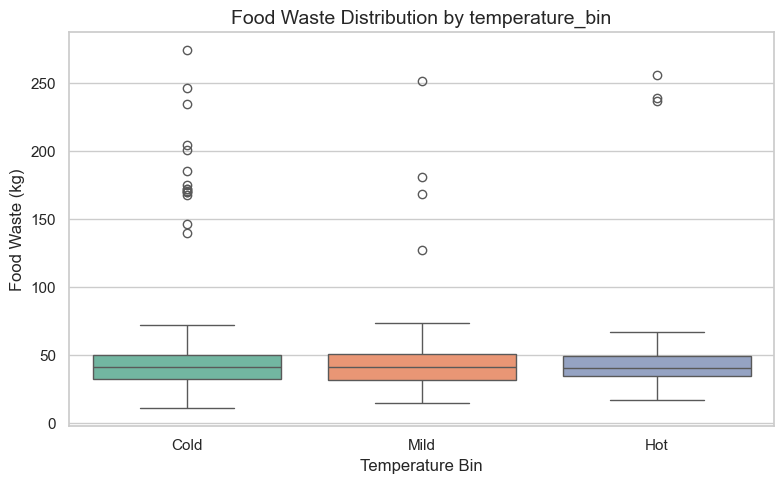

C:\Users\User\AppData\Local\Temp\ipykernel_12208\3826001862.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='food_waste_kg', data=data, palette='Set2')


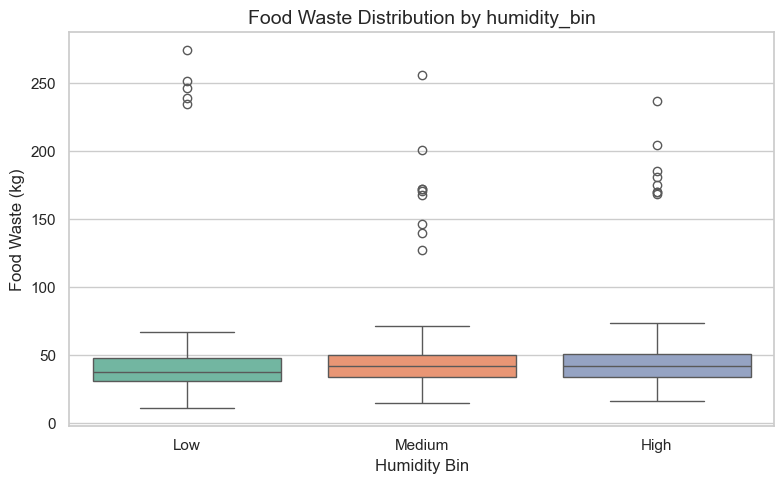

C:\Users\User\AppData\Local\Temp\ipykernel_12208\3826001862.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='food_waste_kg', data=data, palette='Set2')


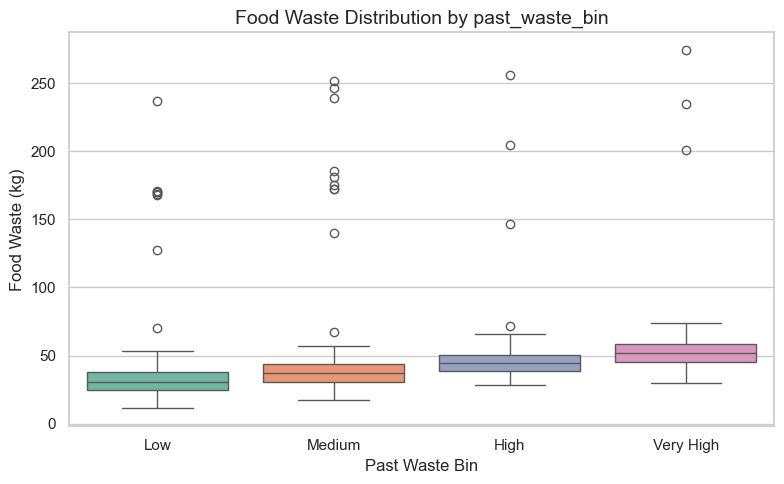

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# List of binned columns to plot
binned_cols = ['temperature_bin', 'humidity_bin', 'past_waste_bin']

# Create boxplots
for col in binned_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='food_waste_kg', data=data, palette='Set2')
    plt.title(f'Food Waste Distribution by {col}', fontsize=14)
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Food Waste (kg)')
    plt.tight_layout()
    plt.show()
